In [1]:
from physicsnemo.datapipes.gnn.hydrographnet_dataset import HydroGraphDataset

dataset = HydroGraphDataset(
    name="hydrograph_dataset",
    data_dir="./outputs_phy/data",
    prefix="M80",
    num_samples=500,
    n_time_steps=2,
    k=4,
    noise_type="none",
    noise_std=0.01,
    hydrograph_ids_file='0_train.txt',
    split="train",
    # hydrograph_ids_file='0_test.txt',
    # split="test",
    # rollout_length=30,
    force_reload=False,
    verbose=False,
    return_physics=True,
)

c:\Users\Carlo\Documents\School\Masters\NUS\Dissertation\HydroGraphNet\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[INFO] Data directory outputs_phy\data already exists. Skipping download.
Processing Hydrographs: 100%|██████████| 90/90 [00:46<00:00,  1.96it/s]


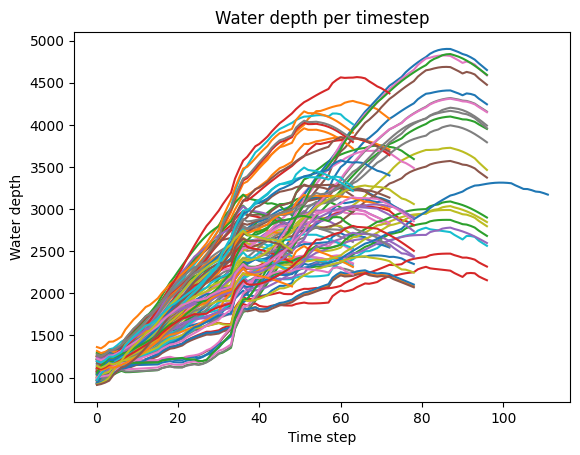

In [2]:
import matplotlib.pyplot as plt

water_depth_mean = dataset.dynamic_stats['water_depth']['mean']
water_depth_std = dataset.dynamic_stats['water_depth']['std']
last_ts = dataset.rollout_length if dataset.split == "test" else None

for dyn in dataset.dynamic_data:
    water_depth = dyn['water_depth'][:last_ts]
    water_depth = dataset.denormalize(water_depth, water_depth_mean, water_depth_std)
    assert (water_depth >= 0).all(), "Water depth should be positive"
    total_wd_per_ts = water_depth.sum(axis=1)
    plt.plot(total_wd_per_ts)
    plt.title(f'Water depth per timestep')
    plt.xlabel('Time step')
    plt.ylabel('Water depth')

In [3]:
import numpy as np


total_nodes = dataset.dynamic_data[0]['water_depth'].shape[1]
print(f"Total nodes for train: {total_nodes}")

dataset_num_timesteps = []
dataset_flooded_percentage = []
for dyn in dataset.dynamic_data:
    water_depth = dyn['water_depth']
    is_flooded = water_depth > 0
    flooded_nodes = is_flooded.sum(axis=1)
    average_flooded_nodes = flooded_nodes.mean()
    flooded_percentage = (average_flooded_nodes / total_nodes) * 100
    dataset_flooded_percentage.append(flooded_percentage)
    dataset_num_timesteps.append(water_depth.shape[0])

print(f"Average Flooded percentage for train: {np.array(dataset_flooded_percentage).mean():.2f}%")
print(f"Flood percentages for train: {dataset_flooded_percentage}")
print(f"Average number of timesteps for train: {np.array(dataset_num_timesteps).mean():.0f}")


Total nodes for train: 4787
Average Flooded percentage for train: 24.07%
Flood percentages for train: [28.744085678782096, 31.447041216078937, 23.27038071861291, 22.712874579537264, 22.965192187173596, 21.972774904823012, 20.303360664299145, 19.60113061309755, 28.586657592836268, 19.813013987713322, 21.119699185293502, 18.576947587479804, 26.651218183266966, 19.789205731157626, 23.49141939785549, 18.247204321831543, 23.61761734835499, 18.98305306037184, 21.562630561938583, 30.11313191978274, 24.92109051054368, 20.776934128571, 28.414773132931227, 20.763924632649854, 19.44817996657614, 30.26258832447845, 27.006422986305207, 30.19518067618701, 20.805924207995293, 22.672013335084927, 21.54035902029183, 29.56065371110685, 22.801229274301747, 23.563025387851592, 22.986223427280496, 27.13168611725485, 19.683844265719657, 20.676441403801963, 24.543275494843208, 19.249725819928976, 30.751239934616738, 28.879648005013582, 24.07242403959704, 28.7845792400079, 21.374873404500054, 24.2963963474135